# Initial EDA

In this notebook, I explore the data for the first time using the 2019 dataset to get a feel for the columns and layout of the data.  

My aim after this exploration is to have a good grasp on what the dataset contains, how things will need to be changed/formatted/engineered in order to create my FSM. 

### Imports

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

parent_dir = '../../'

In [100]:
from IPython.display import display
pd.options.display.max_columns = None

### Import Data

In [101]:
prr19 = pd.read_csv(parent_dir + 'data/prr_2019.csv')
prr19.head()

,OBJECTID,ZIP,FILENUM,UOFNum,OCCURRED_D,OCCURRED_T,CURRENT_BA,OffSex,OffRace,HIRE_DT,OFF_INJURE,OffCondTyp,OFF_HOSPIT,SERVICE_TY,ForceType,UOF_REASON,Cycles_Num,ForceEffec,STREET_N,STREET,street_g,street_t,Address,CitNum,CitRace,CitSex,CIT_INJURE,CitCondTyp,CIT_ARREST,CIT_INFL_A,CitChargeT,Council District,RA,BEAT,SECTOR,DIVISION,X,Y,GeoLocation,Council Districts--Test,Dallas City Limits GIS Layer
0,2817,75253.0,UF2019-1702,"62295, 63542",12/01/2019,10:34 PM,11285,Male,White,03/08/2017,False,No injuries noted or visible,False,Service Call,"BD - Tripped, BD - Grabbed",Detention/Frisk,NaN,"Yes, Yes",102,Beltline,S,Rd.,102 S Beltline Rd.,60833,White,Male,False,No injuries noted or visible,False,Agitated,No Arrest,D8,6062.0,357.0,350.0,SOUTHEAST,2557123.437,6944231.397,POINT (-96.586265 32.702825),8.0,3.0
1,2234,75208.0,UF2019-1344,61093,10/06/2019,12:50 AM,11208,Male,White,08/24/2016,True,No injuries noted or visible,False,Arrest,Held Suspect Down,Arrest,NaN,Yes,1500,Oak Cliff,S,Blvd.,1500 S Oak Cliff Blvd.,6020748798,Hispanic,Female,True,Injured prior to contact,True,Agitated,APOWW,D1,4160.0,444.0,440.0,SOUTHWEST,2474936.793,6952151.398,POINT (-96.853036 32.729136),1.0,3.0
2,2755,75231.0,UF2019-1665,62820,12/31/2019,11:37 PM,9415,Male,White,04/02/2008,False,No injuries noted or visible,False,Arrest,K-9 Deployment,Arrest,NaN,Yes,6904,Walling,NaN,Ln.,6904 Walling Ln.,61130,Black,Male,True,Bite,True,Poor hygiene,"Burglary/Habitation, Warrant/Hold",D9,6034.0,247.0,240.0,NORTHEAST,2508349.267,7001784.466,POINT (-96.741661 32.863941),13.0,3.0
3,2110,75228.0,UF2019-1314,60990,09/30/2019,6:20 PM,9884,Male,Hispanic,06/10/2009,False,No injuries noted or visible,False,Call for Cover,Joint Locks,Arrest,NaN,Yes,11760,Ferguson,NaN,Rd.,11760 Ferguson Rd.,26625,White,Female,False,No injuries noted or visible,True,Unknown Drugs,"Assault/FV, Resisting Arrest, Warrant/Hold",D9,1132.0,228.0,220.0,NORTHEAST,2536678.324,6999039.025,POINT (-96.649175 32.855492),13.0,3.0
4,1663,75051.0,UF2019-1030,"59592, 59600",08/04/2019,12:10 AM,10480,Male,Hispanic,09/26/2012,True,No injuries noted or visible,False,Arrest,"Joint Locks, BD - Grabbed",Arrest,NaN,"Yes, Yes",1350,Skyline,NaN,Rd.,1350 Skyline Rd.,59513,Black,Male,False,No injuries noted or visible,True,Agitated,Assault/Public Servant,NaN,NaN,NaN,NaN,NaN,2433285.622,6953645.720,POINT (-96.98722 32.734935),NaN,NaN


In [102]:
prr19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 41 columns):
OBJECTID                        2944 non-null int64
ZIP                             2943 non-null float64
FILENUM                         2944 non-null object
UOFNum                          2944 non-null object
OCCURRED_D                      2944 non-null object
OCCURRED_T                      2931 non-null object
CURRENT_BA                      2944 non-null int64
OffSex                          2944 non-null object
OffRace                         2944 non-null object
HIRE_DT                         2944 non-null object
OFF_INJURE                      2944 non-null bool
OffCondTyp                      2944 non-null object
OFF_HOSPIT                      2944 non-null bool
SERVICE_TY                      2937 non-null object
ForceType                       2944 non-null object
UOF_REASON                      2937 non-null object
Cycles_Num                      174 non-null objec

## Inital comments

There does not appear to be any documentation for this dataset and so we might need to make some inferences about certain columns and dig deeper into what they mean. For now, I'll detail my current understanding of the column descriptions:

### Column Descriptions

- objectid:  this appears to be the incident ID and should be unique (check this).  This is probably the identifier of the dataset
- zip:  zip code of the incident - currently a float, should probably change to integer
- filenum:  the file number of the incident that is recorded in official police records - check this and make sure it aligns with police records (should be able to look file numbers up...)
- uofnum:  UOF should stand for 'Use of Force'.  The use of force number probably refers to an id number relating to the type of force used.  Should check that uofnum and forcetype match up. 
- occurred_d:  Date the incident occured.  Change to datetime object
- occured_t:  time the incident occured.  Change to datetime object
- current_ba:  Not sure what this column means - will need to look this up.  What does ba mean?  It looks like some sort of identification number - I wonder if it's a number that identifies the police officer?
- offsex:  Sex of the officer 
- offrace:  Race of the officer
- hire_dt:  Date the officer was hired.  Change to datetime object
- off_injure:  Whether the officer was injured during the encounter.
- offcondtype:  What type of condition the officer was in after the incident and/or what injury/ies they had
- off_hospit:  I think this is whether the officer had to go to hospital or not - check this
- service_ty:  I'm not sure what this is exactly but it looks like it is what type of service the officer performed during the incident or what it was labelled as when the officer was called to the scene.  e.g. were they performing an arrest, were they off duty and witnessed a crime, were they attending a service call etc
- forcetype:  This details what type of force was used on the citizen
- street_n:  The street number of the incident
- street:  The street of the incident
- street_g:  This appears to be the direction of the street address (E, S etc)
- street_t:  This is the street type (rd, st, blvd etc)
- address:  The full address (as specified by above fields)
- citnum:  This appears to be some sort of identification number for the citizen.  I'm not clear on this though and I should verify this
- citrace:  Race of the citizen
- citsex:  Sex of the citzen
- cit_injure:  Whether the citizen was injured during the encounter or not
- citcondtyp:  The condition of the citizen after the incident
- cit_arrest:  Whether the citizen was arrested or not (it should be determined whether they were arrested because of the inital incident or arrested because of the resistance (is the dataset on resistance to arrest?  What other types of resistance are there?)
- cit_infl_a:  Was the citizen under the influence of anything during the incident.  'Mentally unstable' is a value in this column so are they counting mental instability as being 'under the influence'?
- citcharget:  Details of what the citizen was being arrest for
- council district:  The ID of the coucil district of the incident
- ra:  Not sure what RA is - look this up
- beat:  The police beat in which the incident occured?  Or is this the police beat from which the officers are from?
- sector:  The police sector?  Or the county section?  Check this
- division:  I think this relates to county info?  But could be more police sector info?  Check this - is it even needed?
- x:  Coordinates of the incident?  Not sure...
- y:  coordinates of the incident?  Not sure...
- geolocation:  Location of the incident
- council districts--test:  Not sure
- dallas city limis gis layer:  Not sure

### Other questions about the data:
- Is the dataset on resistance to arrest?  What other types of resistance are there?
- In the cit_infl_a column, 'Mentally unstable' is a value in this column so are they counting mental instability as being 'under the influence'?

## Data Prep

In [103]:
# change column names to lower case:
prr19.columns = prr19.columns.str.lower()

In [104]:
prr19.head()

,objectid,zip,filenum,uofnum,occurred_d,occurred_t,current_ba,offsex,offrace,hire_dt,off_injure,offcondtyp,off_hospit,service_ty,forcetype,uof_reason,cycles_num,forceeffec,street_n,street,street_g,street_t,address,citnum,citrace,citsex,cit_injure,citcondtyp,cit_arrest,cit_infl_a,citcharget,council district,ra,beat,sector,division,x,y,geolocation,council districts--test,dallas city limits gis layer
0,2817,75253.0,UF2019-1702,"62295, 63542",12/01/2019,10:34 PM,11285,Male,White,03/08/2017,False,No injuries noted or visible,False,Service Call,"BD - Tripped, BD - Grabbed",Detention/Frisk,NaN,"Yes, Yes",102,Beltline,S,Rd.,102 S Beltline Rd.,60833,White,Male,False,No injuries noted or visible,False,Agitated,No Arrest,D8,6062.0,357.0,350.0,SOUTHEAST,2557123.437,6944231.397,POINT (-96.586265 32.702825),8.0,3.0
1,2234,75208.0,UF2019-1344,61093,10/06/2019,12:50 AM,11208,Male,White,08/24/2016,True,No injuries noted or visible,False,Arrest,Held Suspect Down,Arrest,NaN,Yes,1500,Oak Cliff,S,Blvd.,1500 S Oak Cliff Blvd.,6020748798,Hispanic,Female,True,Injured prior to contact,True,Agitated,APOWW,D1,4160.0,444.0,440.0,SOUTHWEST,2474936.793,6952151.398,POINT (-96.853036 32.729136),1.0,3.0
2,2755,75231.0,UF2019-1665,62820,12/31/2019,11:37 PM,9415,Male,White,04/02/2008,False,No injuries noted or visible,False,Arrest,K-9 Deployment,Arrest,NaN,Yes,6904,Walling,NaN,Ln.,6904 Walling Ln.,61130,Black,Male,True,Bite,True,Poor hygiene,"Burglary/Habitation, Warrant/Hold",D9,6034.0,247.0,240.0,NORTHEAST,2508349.267,7001784.466,POINT (-96.741661 32.863941),13.0,3.0
3,2110,75228.0,UF2019-1314,60990,09/30/2019,6:20 PM,9884,Male,Hispanic,06/10/2009,False,No injuries noted or visible,False,Call for Cover,Joint Locks,Arrest,NaN,Yes,11760,Ferguson,NaN,Rd.,11760 Ferguson Rd.,26625,White,Female,False,No injuries noted or visible,True,Unknown Drugs,"Assault/FV, Resisting Arrest, Warrant/Hold",D9,1132.0,228.0,220.0,NORTHEAST,2536678.324,6999039.025,POINT (-96.649175 32.855492),13.0,3.0
4,1663,75051.0,UF2019-1030,"59592, 59600",08/04/2019,12:10 AM,10480,Male,Hispanic,09/26/2012,True,No injuries noted or visible,False,Arrest,"Joint Locks, BD - Grabbed",Arrest,NaN,"Yes, Yes",1350,Skyline,NaN,Rd.,1350 Skyline Rd.,59513,Black,Male,False,No injuries noted or visible,True,Agitated,Assault/Public Servant,NaN,NaN,NaN,NaN,NaN,2433285.622,6953645.720,POINT (-96.98722 32.734935),NaN,NaN


In [105]:
prr19.columns

Index(['objectid', 'zip', 'filenum', 'uofnum', 'occurred_d', 'occurred_t',
       'current_ba', 'offsex', 'offrace', 'hire_dt', 'off_injure',
       'offcondtyp', 'off_hospit', 'service_ty', 'forcetype', 'uof_reason',
       'cycles_num', 'forceeffec', 'street_n', 'street', 'street_g',
       'street_t', 'address', 'citnum', 'citrace', 'citsex', 'cit_injure',
       'citcondtyp', 'cit_arrest', 'cit_infl_a', 'citcharget',
       'council district', 'ra', 'beat', 'sector', 'division', 'x', 'y',
       'geolocation', 'council districts--test',
       'dallas city limits gis layer'],
      dtype='object')

In [106]:
col_names = ['objectid', 'zip', 'file_num', 'uof_num', 'date_occured', 'time_occured', 'current_ba', 'off_sex', 'off_race', 'hire_date', 'off_injured', 'off_cond_type',
            'off_hospital', 'service_type', 'uof_type', 'uof_reason', 'cycles_num', 'uof_effective', 'street_n', 'street', 'street_g', 'street_t', 'address', 'cit_num', 
            'cit_race', 'cit_sex', 'cit_injured', 'cit_cond_type', 'cit_arrest', 'cit_influence', 'cit_charge_type', 'council_district', 'ra', 'beat', 'sector', 'division',
            'x', 'y', 'geolocation', 'council_districts_test', 'dallas_city_limis_gis_layer']

In [107]:
len(prr19.columns)

41

In [108]:
len(col_names)

41

In [109]:
prr19.columns = col_names

In [110]:
prr19.head()

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
0,2817,75253.0,UF2019-1702,"62295, 63542",12/01/2019,10:34 PM,11285,Male,White,03/08/2017,False,No injuries noted or visible,False,Service Call,"BD - Tripped, BD - Grabbed",Detention/Frisk,NaN,"Yes, Yes",102,Beltline,S,Rd.,102 S Beltline Rd.,60833,White,Male,False,No injuries noted or visible,False,Agitated,No Arrest,D8,6062.0,357.0,350.0,SOUTHEAST,2557123.437,6944231.397,POINT (-96.586265 32.702825),8.0,3.0
1,2234,75208.0,UF2019-1344,61093,10/06/2019,12:50 AM,11208,Male,White,08/24/2016,True,No injuries noted or visible,False,Arrest,Held Suspect Down,Arrest,NaN,Yes,1500,Oak Cliff,S,Blvd.,1500 S Oak Cliff Blvd.,6020748798,Hispanic,Female,True,Injured prior to contact,True,Agitated,APOWW,D1,4160.0,444.0,440.0,SOUTHWEST,2474936.793,6952151.398,POINT (-96.853036 32.729136),1.0,3.0
2,2755,75231.0,UF2019-1665,62820,12/31/2019,11:37 PM,9415,Male,White,04/02/2008,False,No injuries noted or visible,False,Arrest,K-9 Deployment,Arrest,NaN,Yes,6904,Walling,NaN,Ln.,6904 Walling Ln.,61130,Black,Male,True,Bite,True,Poor hygiene,"Burglary/Habitation, Warrant/Hold",D9,6034.0,247.0,240.0,NORTHEAST,2508349.267,7001784.466,POINT (-96.741661 32.863941),13.0,3.0
3,2110,75228.0,UF2019-1314,60990,09/30/2019,6:20 PM,9884,Male,Hispanic,06/10/2009,False,No injuries noted or visible,False,Call for Cover,Joint Locks,Arrest,NaN,Yes,11760,Ferguson,NaN,Rd.,11760 Ferguson Rd.,26625,White,Female,False,No injuries noted or visible,True,Unknown Drugs,"Assault/FV, Resisting Arrest, Warrant/Hold",D9,1132.0,228.0,220.0,NORTHEAST,2536678.324,6999039.025,POINT (-96.649175 32.855492),13.0,3.0
4,1663,75051.0,UF2019-1030,"59592, 59600",08/04/2019,12:10 AM,10480,Male,Hispanic,09/26/2012,True,No injuries noted or visible,False,Arrest,"Joint Locks, BD - Grabbed",Arrest,NaN,"Yes, Yes",1350,Skyline,NaN,Rd.,1350 Skyline Rd.,59513,Black,Male,False,No injuries noted or visible,True,Agitated,Assault/Public Servant,NaN,NaN,NaN,NaN,NaN,2433285.622,6953645.720,POINT (-96.98722 32.734935),NaN,NaN


### Change dtypes and NaNs

Check first for nan's in each column

In [111]:
prr19.isna().sum()

objectid                          0
zip                               1
file_num                          0
uof_num                           0
date_occured                      0
time_occured                     13
current_ba                        0
off_sex                           0
off_race                          0
hire_date                         0
off_injured                       0
off_cond_type                     0
off_hospital                      0
service_type                      7
uof_type                          0
uof_reason                        7
cycles_num                     2770
uof_effective                     0
street_n                          0
street                            0
street_g                       2193
street_t                         39
address                           2
cit_num                           0
cit_race                         38
cit_sex                          10
cit_injured                       0
cit_cond_type               

In [112]:
prr19[prr19.zip.isna()]

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
1992,2680,NaN,UF2019-1625,"61775, 61776",11/07/2019,3:34 AM,11219,Male,White,09/07/2016,False,No injuries noted or visible,False,Arrest,"Weapon display at Person, Verbal Command",Arrest,NaN,"Yes, Yes",0,I-345,S,Frwy.,NaN,60552,Black,Male,False,No injuries noted or visible,True,Unknown,Warrant/Hold,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


It looks like most of the 'na' values are in relation to the location.  There are 38 entries missing race and 10 missing sex which are more valuable features not to miss. 

Missing the most balues from the cycles_num column which I don't know what this column represents.  I'll have a look at unique values below.  Missing street directions as well but this is to be expected since not all streets have specified directions. 

Other nan's a reasonable since it means it just wasn't relevant to the incident.

In [113]:
prr19.cycles_num.unique()

array([nan, '1', '3', '2', '0', '22', '4', '1, 1', '6', '0, 1', '1, 3',
       '0, 0'], dtype=object)

In [114]:
# zip to int:
prr19.zip.unique()

array([75253., 75208., 75231., 75228., 75051., 75217., 75214., 75204.,
       75201., 75207., 75216., 75202., 75287., 75252., 75212., 75236.,
       75243., 75218., 75241., 75210., 75237., 75226., 75211., 75240.,
       75233., 75215., 75224., 75244., 75227., 75230., 75203., 75235.,
       75205., 75247., 75238., 75219., 75220., 75229., 75246., 75249.,
       75223., 75234., 75206., 75232., 75254., 75115., 75248., 75225.,
       75251., 75209., 75134.,    nan])

In [115]:
prr19.zip.isna().sum()

1

In [116]:
prr19.astype({'zip': 'int64'}, errors = 'ignore', inplace = True)

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
0,2817,75253.0,UF2019-1702,"62295, 63542",12/01/2019,10:34 PM,11285,Male,White,03/08/2017,False,No injuries noted or visible,False,Service Call,"BD - Tripped, BD - Grabbed",Detention/Frisk,NaN,"Yes, Yes",102,Beltline,S,Rd.,102 S Beltline Rd.,60833,White,Male,False,No injuries noted or visible,False,Agitated,No Arrest,D8,6062.0,357.0,350.0,SOUTHEAST,2557123.437,6944231.397,POINT (-96.586265 32.702825),8.0,3.0
1,2234,75208.0,UF2019-1344,61093,10/06/2019,12:50 AM,11208,Male,White,08/24/2016,True,No injuries noted or visible,False,Arrest,Held Suspect Down,Arrest,NaN,Yes,1500,Oak Cliff,S,Blvd.,1500 S Oak Cliff Blvd.,6020748798,Hispanic,Female,True,Injured prior to contact,True,Agitated,APOWW,D1,4160.0,444.0,440.0,SOUTHWEST,2474936.793,6952151.398,POINT (-96.853036 32.729136),1.0,3.0
2,2755,75231.0,UF2019-1665,62820,12/31/2019,11:37 PM,9415,Male,White,04/02/2008,False,No injuries noted or visible,False,Arrest,K-9 Deployment,Arrest,NaN,Yes,6904,Walling,NaN,Ln.,6904 Walling Ln.,61130,Black,Male,True,Bite,True,Poor hygiene,"Burglary/Habitation, Warrant/Hold",D9,6034.0,247.0,240.0,NORTHEAST,2508349.267,7001784.466,POINT (-96.741661 32.863941),13.0,3.0
3,2110,75228.0,UF2019-1314,60990,09/30/2019,6:20 PM,9884,Male,Hispanic,06/10/2009,False,No injuries noted or visible,False,Call for Cover,Joint Locks,Arrest,NaN,Yes,11760,Ferguson,NaN,Rd.,11760 Ferguson Rd.,26625,White,Female,False,No injuries noted or visible,True,Unknown Drugs,"Assault/FV, Resisting Arrest, Warrant/Hold",D9,1132.0,228.0,220.0,NORTHEAST,2536678.324,6999039.025,POINT (-96.649175 32.855492),13.0,3.0
4,1663,75051.0,UF2019-1030,"59592, 59600",08/04/2019,12:10 AM,10480,Male,Hispanic,09/26/2012,True,No injuries noted or visible,False,Arrest,"Joint Locks, BD - Grabbed",Arrest,NaN,"Yes, Yes",1350,Skyline,NaN,Rd.,1350 Skyline Rd.,59513,Black,Male,False,No injuries noted or visible,True,Agitated,Assault/Public Servant,NaN,NaN,NaN,NaN,NaN,2433285.622,6953645.720,POINT (-96.98722 32.734935),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,1781,75215.0,UF2019-1102,59811,08/12/2019,2:04 AM,6591,Male,White,11/26/1990,False,No injuries noted or visible,False,Suspicious Activity,Taser Display at Person,Weapon Display,NaN,Yes,1500,Park Row,NaN,Ave.,1500 Park Row Ave.,59597,Black,Male,False,No injuries noted or visible,True,Alchohol and unknown drugs,"Assault, Warrant/Hold",D7,2156.0,341.0,340.0,SOUTHEAST,2496871.306,6964445.291,POINT (-96.7809 32.762064),7.0,3.0
2940,761,75211.0,UF2019-0499,"57053, 57054",04/29/2019,10:13 AM,6700,Male,Black,07/29/1991,False,No injuries noted or visible,False,Traffic Stop,"BD - Grabbed, Verbal Command",Arrest,NaN,"Yes, Yes",3300,Illinois,W,Ave.,3300 W Illinois Ave.,58359,Black,Male,False,No injuries noted or visible,True,Agitated,"Resisting Search and Transport, Other Misdemea...",D3,4207.0,447.0,440.0,SOUTHWEST,2468375.282,6948836.893,POINT (-96.875119 32.720235),3.0,3.0
2941,405,75206.0,UF2019-0261,"54840, 54841, 54842",01/26/2019,2:50 AM,8441,Male,White,08/18/2003,False,No injuries noted or visible,False,Crowd Control,"Verbal Command, OC Spray, Foot Pursuit",Arrest,NaN,"No, Yes, No",3012,HENDERSON,N,Ave.,3012 N HENDERSON Ave.,54155,White,Male,True,"Injured prior to contact, OC Spray Treatment",True,Alchohol and unknown drugs,"Public Intoxication, Resisting Arrest, Evading...",D14,1160.0,143.0,140.0,CENTRAL,2495185.780,6986086.071,POINT (-96.785501 32.821585),12.0,3.0
2942,1611,75218.0,UF2019-1000,"5

Not sure why it won't change zip to an int... I guess it doesn't matter...

In [117]:
prr19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 41 columns):
objectid                       2944 non-null int64
zip                            2943 non-null float64
file_num                       2944 non-null object
uof_num                        2944 non-null object
date_occured                   2944 non-null object
time_occured                   2931 non-null object
current_ba                     2944 non-null int64
off_sex                        2944 non-null object
off_race                       2944 non-null object
hire_date                      2944 non-null object
off_injured                    2944 non-null bool
off_cond_type                  2944 non-null object
off_hospital                   2944 non-null bool
service_type                   2937 non-null object
uof_type                       2944 non-null object
uof_reason                     2937 non-null object
cycles_num                     174 non-null object
uof_effective  

Change date time objects:

In [118]:
prr19['date_occured'] = pd.to_datetime(prr19.date_occured)

In [119]:
prr19['time_occured'] = pd.to_datetime(prr19.time_occured)

In [120]:
prr19['hire_date'] = pd.to_datetime(prr19.hire_date)

In [121]:
prr19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 41 columns):
objectid                       2944 non-null int64
zip                            2943 non-null float64
file_num                       2944 non-null object
uof_num                        2944 non-null object
date_occured                   2944 non-null datetime64[ns]
time_occured                   2931 non-null datetime64[ns]
current_ba                     2944 non-null int64
off_sex                        2944 non-null object
off_race                       2944 non-null object
hire_date                      2944 non-null datetime64[ns]
off_injured                    2944 non-null bool
off_cond_type                  2944 non-null object
off_hospital                   2944 non-null bool
service_type                   2937 non-null object
uof_type                       2944 non-null object
uof_reason                     2937 non-null object
cycles_num                     174 non-nul

### Officer Sex and Race info:

In [122]:
prr19.off_sex.unique()

array(['Male', 'Female'], dtype=object)

In [123]:
prr19.off_sex.value_counts()

Male      2611
Female     333
Name: off_sex, dtype: int64

In [124]:
prr19.off_sex.value_counts(normalize = True)

Male      0.886889
Female    0.113111
Name: off_sex, dtype: float64

In [125]:
# visualise:

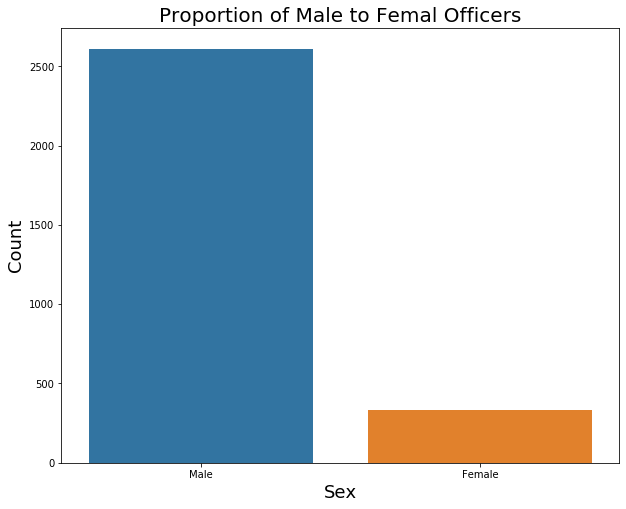

In [126]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = "off_sex", data = prr19)
ax.set_title('Proportion of Male to Femal Officers', fontsize = 20)
ax.set_xlabel('Sex', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18)
plt.show()

We can see here that over 88% of cops are male.

In [127]:
prr19.off_race.unique()

array(['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Ind'],
      dtype=object)

In [128]:
# visualise

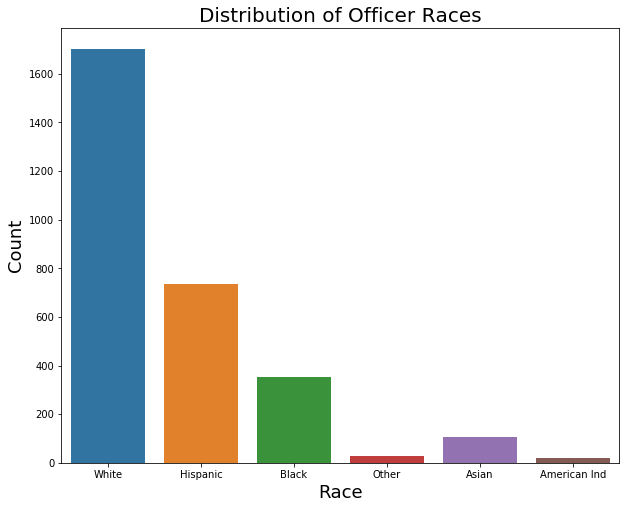

In [129]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = "off_race", data = prr19)
ax.set_title('Distribution of Officer Races', fontsize = 20)
ax.set_xlabel('Race', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18)
plt.show()

In [130]:
prr19.off_race.value_counts(normalize = True)

White           0.578465
Hispanic        0.250340
Black           0.119226
Asian           0.036345
Other           0.009171
American Ind    0.006454
Name: off_race, dtype: float64

So here we see that 58% of cops are white, 25% are hispanic and 12% are black.

### Citizen Sex and Race info:

In [131]:
prr19.cit_sex.unique()

array(['Male', 'Female', nan, 'Unknown'], dtype=object)

In [132]:
for val in prr19.cit_sex.unique():
    print(type(val))

<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>


So we have both 'unknown' and 'nan' values.  It would be best to consolidate these into one group since nan most likely means 'unknown'

In [133]:
prr19.cit_sex.isna().sum()

10

In [134]:
prr19[prr19['cit_sex'] == 'Unknown'].shape

(4, 41)

In [135]:
prr19.cit_sex.replace('Unknown', np.nan, inplace = True)

In [136]:
prr19.cit_sex.isna().sum()

14

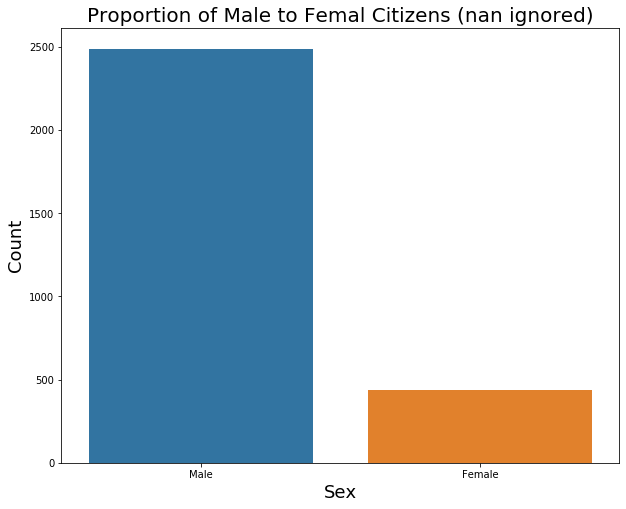

In [137]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = "cit_sex", data = prr19)
ax.set_title('Proportion of Male to Femal Citizens (nan ignored)', fontsize = 20)
ax.set_xlabel('Sex', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18)
plt.show()

In [138]:
prr19.cit_sex.value_counts(normalize = True)

Male      0.849829
Female    0.150171
Name: cit_sex, dtype: float64

85% of citizens in this dataset are male.

In [139]:
prr19.cit_race.unique()

array(['White', 'Hispanic', 'Black', 'Asian', nan, 'Other',
       'American Ind', 'Unknown'], dtype=object)

We've got `Unknown`, `nan` and `Other` as categories.  Could these actually be categoriesed into the one category?

In [140]:
prr19.cit_race.isna().sum()

38

In [141]:
prr19[prr19['cit_race'] == 'Unknown'].shape

(4, 41)

In [142]:
prr19[prr19['cit_race'] == 'Other'].shape

(11, 41)

So there are 38 'nan', 4 'unknown' and 11 'other' categories.  I think I'm going to combine these for now because I think all signify that a race was not identified. 

In [143]:
prr19.cit_race.replace('Unknown', np.nan, inplace = True)
prr19.cit_race.replace('Other', np.nan, inplace = True)

In [144]:
prr19.cit_race.isna().sum()

53

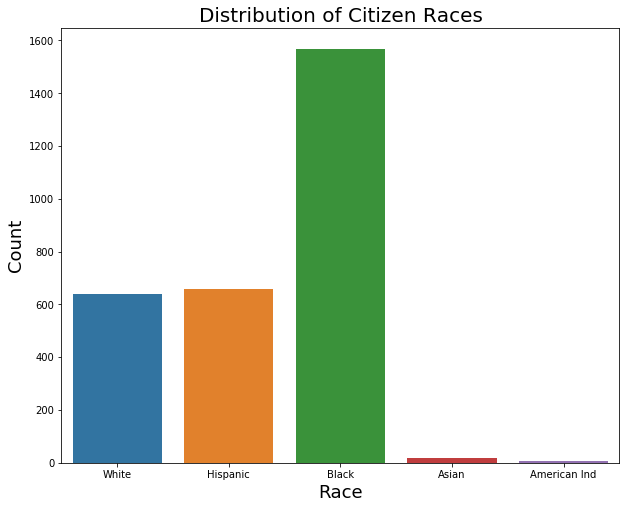

In [145]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = "cit_race", data = prr19)
ax.set_title('Distribution of Citizen Races', fontsize = 20)
ax.set_xlabel('Race', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18)
plt.show()

In [146]:
prr19.cit_race.value_counts(normalize = True)

Black           0.542719
Hispanic        0.227257
White           0.221377
Asian           0.006226
American Ind    0.002421
Name: cit_race, dtype: float64

So here we see that 55% of citizens in this dataset are black, 22% are white and also 22% are hispanic.  Very small amount are asian and american indian. 

Check where we are:

In [147]:
prr19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 41 columns):
objectid                       2944 non-null int64
zip                            2943 non-null float64
file_num                       2944 non-null object
uof_num                        2944 non-null object
date_occured                   2944 non-null datetime64[ns]
time_occured                   2931 non-null datetime64[ns]
current_ba                     2944 non-null int64
off_sex                        2944 non-null object
off_race                       2944 non-null object
hire_date                      2944 non-null datetime64[ns]
off_injured                    2944 non-null bool
off_cond_type                  2944 non-null object
off_hospital                   2944 non-null bool
service_type                   2937 non-null object
uof_type                       2944 non-null object
uof_reason                     2937 non-null object
cycles_num                     174 non-nul

### Count Num of Citizens and Num of Officers

How many officers and how many citizen's in the dataset?  Any repeats?

In [148]:
# number of unique citizen numbers - at the moment I think these are unique identifiers for individual citizens
len(prr19.cit_num.unique())

1649

So there are only 1649 unique citizen numbers in this dataset which suggests that we have some repeat offenders?

In [149]:
prr19.cit_num.unique()

array(['60833', '6020748798', '61130', ..., '60505', '59597', '59519'],
      dtype=object)

In [150]:
for num in prr19.cit_num.unique():
    print(len(num))

5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
10
10
5
5
5
5
5
5
5
5
35
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
15
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
5
5
5
10
5
5
5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
15
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
3
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
15
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
10
5
5
10
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
25
4
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
20
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
10
5
5
5
5
5
5
5
15
5
5
5
5
5
5
5
5
30
5
5
5
5
5
5
5
5
10
5
3
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
13
5
5
5
5
10
5
5
5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5

So from looking at the above print outs (it's long), all the cit_nums are multiples of 5, which makes me wonder if it's a combination of citizen numbers for multiple people involved?  I'm not sure what else cit_num could be a I might have to come back to this.

In [151]:
prr19.cit_num.duplicated().sum()

1295

In [152]:
prr19[prr19.cit_num.duplicated()].sort_values(by = ['cit_num'])

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
2718,1057,75215.0,UF2019-0680,"57854, 57855",2019-05-28,2020-08-04 05:50:00,11253,Male,White,2016-12-28,False,No injuries noted or visible,False,Service Call,"Held Suspect Down, Feet/Leg/Knee Strike",Danger to self or others,NaN,"Yes, Yes",4100,Malcolm X,S,Blvd.,4100 S Malcolm X Blvd.,10065,Black,Male,True,"Laceration/Cut, Hospital Drug Evaluation",True,Unknown Drugs,Public Intoxication,D7,2145.0,346.0,340.0,SOUTHEAST,2504118.823,6963835.928,NaN,NaN,NaN
876,2788,75240.0,UF2019-1686,"62013, 62016",2019-11-18,2020-08-04 13:56:00,11423,Male,White,2017-11-29,False,No injuries noted or visible,False,Arrest,"Weapon display at Person, Verbal Command",Arrest,NaN,"Yes, Yes",13900,Far Hills,NaN,Ln.,13900 Far Hills Ln.,14482,White,Male,False,No injuries noted or visible,True,None detected,"Deadly Conduct, Warrant/Hold, Other Felony Arr...",D11,1020.0,635.0,630.0,NORTH CENTRAL,2498234.179,7028022.056,POINT (-96.773316 32.936593),10.0,3.0
734,1488,75228.0,UF2019-0933,"58175, 58176, 58177, 58178, 58179, 58180",2019-06-10,2020-08-04 17:20:00,10379,Male,Hispanic,2012-05-09,False,No injuries noted or visible,False,Arrest,"Verbal Command, Held Suspect Down, Held Suspec...",Active Aggression,NaN,"No, No, Yes, No, Yes, Yes",1500,John West,NaN,Rd.,1500 John West Rd.,15762,Black,Male,True,"Laceration/Cut, Redness/Swelling",True,Alchohol,"Other Misdemeanor Arrest, Drug Possession - Mi...",D7,1202.0,221.0,220.0,NORTHEAST,2524365.552,6981286.281,POINT (-96.689496 32.806931),7.0,3.0
942,843,75226.0,UF2019-0547,"57438, 57439, 57440",2019-05-12,2020-08-04 02:13:00,10876,Male,White,2014-08-13,False,No injuries noted or visible,False,Arrest,"Held Suspect Down, Hand Controlled Escort, Ver...",Arrest,NaN,"Yes, Yes, No",2800,Elm,NaN,St.,2800 Elm St.,18946,Black,Male,False,No injuries noted or visible,True,Alchohol and unknown drugs,"Public Intoxication, Disorderly Conduct",D2,2066.0,153.0,150.0,CENTRAL,2495971.013,6972719.986,POINT (-96.78361 32.784654),2.0,3.0
481,842,75226.0,UF2019-0547,57436,2019-05-12,2020-08-04 02:11:00,9267,Male,Hispanic,2007-09-26,False,No injuries noted or visible,False,Arrest,Take Down - Arm,Arrest,NaN,Yes,2800,Elm,NaN,St.,2800 Elm St.,18946,Black,Male,False,No injuries noted or visible,True,Alchohol and unknown drugs,"Disorderly Conduct, Public Intoxication",D2,2066.0,153.0,150.0,CENTRAL,2495971.013,6972719.986,POINT (-96.78361 32.784654),2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2908,75240.0,UF2019-1775,"62798, 62799, 63647",2019-12-29,2020-08-04 22:47:00,10439,Male,White,2012-09-26,False,No injuries noted or visible,False,Service Call,"Weapon display at Person, Feet/Leg/Knee Strike...",Arrest,NaN,"Yes, Yes, Yes",7373,Valley View,NaN,Ln.,7373 Valley View Ln.,61119,NaN,Male,False,No injuries noted or visible,True,NaN,"Other Misdemeanor Arrest, Drug Possession - Fe...",D11,1019.0,635.0,630.0,NORTH CENTRAL,2496698.588,7023901.627,POINT (-96.778472 32.925318),10.0,3.0
2925,2941,75204.0,UF2019-1805,"62813, 62818, 62819",2019-12-28,2020-08-04 01:00:00,10416,Male,White,2012-06-20,False,No injuries noted or visible,False,Off-Duty Employment,"Verbal Command, Hand Controlled Escort, Held S...",Arrest,NaN,"No, Yes, Yes",2424,Swiss,NaN,Ave.,2424 Swiss Ave.,61129,Hispanic,Female,False,No injuries noted or visible,True,Alchohol and unknown drugs,Public Intoxication,D14,2052.0,154.0,150.0,CENTRAL,2493813.725,6972766.499,POINT (-96.790503 32.784987),12.0,3.0
963,591,75204.0,UF2019-0396,

In [153]:
cit_num_counts = prr19.cit_num.value_counts()

In [154]:
cit_num_counts

6006060061         78
605076050860509    16
37379              12
55113              10
57295               9
                   ..
59155               1
57051               1
60354               1
58872               1
57901               1
Name: cit_num, Length: 1649, dtype: int64

In [155]:
cit_num_grt_1 = cit_num_counts[cit_num_counts > 1]

In [156]:
cit_num_grt_1

6006060061         78
605076050860509    16
37379              12
55113              10
57295               9
                   ..
59373               2
59427               2
59371               2
58069               2
60623               2
Name: cit_num, Length: 738, dtype: int64

Let's investigate the cit_num with the highest count:  78 to get an idea of what it means to have this number duplicated in muliple entries:

In [157]:
prr19[prr19.cit_num == '6006060061']

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
36,2199,75211.0,UF2019-1335,60914,2019-09-23,2020-08-04 01:20:00,11464,Male,Hispanic,2018-02-21,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,6006060061,Hispanic,Male,False,Hospital Drug Evaluation,True,Agitated,Evading Arrest,D1,4158.0,441.0,440.0,SOUTHWEST,2468692.545,6952640.671,POINT (-96.87399 32.730665),1.0,3.0
41,2170,75211.0,UF2019-1335,60872,2019-09-23,2020-08-04 01:20:00,11333,Male,White,2017-05-31,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,6006060061,Hispanic,Male,False,No injuries noted or visible,True,Agitated,Evading Arrest,D1,4158.0,441.0,440.0,SOUTHWEST,2468692.545,6952640.671,POINT (-96.87399 32.730665),1.0,3.0
49,2162,75211.0,UF2019-1335,60868,2019-09-23,2020-08-04 01:20:00,8163,Male,Hispanic,2002-01-25,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,6006060061,Hispanic,Male,False,No injuries noted or visible,True,Agitated,Evading Arrest,D1,4158.0,441.0,440.0,SOUTHWEST,2468692.545,6952640.671,POINT (-96.87399 32.730665),1.0,3.0
181,2180,75211.0,UF2019-1335,60904,2019-09-23,2020-08-04 01:20:00,10937,Male,White,2014-12-03,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,6006060061,Hispanic,Male,False,No injuries noted or visible,True,Agitated,Evading Arrest,D1,4158.0,441.0,440.0,SOUTHWEST,2468692.545,6952640.671,POINT (-96.87399 32.730665),1.0,3.0
186,2179,75211.0,UF2019-1335,60904,2019-09-23,2020-08-04 01:20:00,10937,Male,White,2014-12-03,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,6006060061,Hispanic,Male,False,Hospital Drug Evaluation,True,Agitated,Evading Arrest,D1,4158.0,441.0,440.0,SOUTHWEST,2468692.545,6952640.671,POINT (-96.87399 32.730665),1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2220,75211.0,UF2019-1335,60924,2019-09-23,2020-08-04 01:20:00,11529,Male,White,2018-05-30,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,6006060061,Hispanic,Male,False,No injuries noted or visible,True,Agitated,Evading Arrest,D1,4158.0,441.0,440.0,SOUTHWEST,2468692.545,6952640.671,POINT (-96.87399 32.730665),1.0,3.0
2762,2211,75211.0,UF2019-1335,60920,2019-09-23,2020-08-04 01:20:00,11453,Male,Hispanic,2018-02-07,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,6006060061,Hispanic,Male,False,Hospital Drug Evaluation,True,Agitated,Evading Arrest,D1,4158.0,441.0,440.0,SOUTHWEST,2468692.545,6952640.671,POINT (-96.87399 32.730665),1.0,3.0
2788,2165,75211.0,UF2019-1335,60870,2019-09-23,2020-08-04 01:20:00,10783,Female,Hispanic,2014-03-12,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,6006060061,Hispanic,Male,False,Hospital Drug Evaluation,True,Agitated,Evading Arrest,D1,4158.0,441.0,440.0,SOUTHWEST,2468692.545,6952640.671,POINT (-96.87399 32.730665),1.0,3.0
2792,2178,75211.0,UF2019-1335,60903,2019-09-23,2020-08-04 01:20:00,11149,Male,White,2016-02-24,False,No injuries noted or visible,False,Service Call,Foot Pursuit,Arrest,NaN,Yes,3228,Grafton,NaN,Ave.,3228 Grafton Ave.,60060600

So it looks like this cit_num relates to the same citizen and the same event since the `date_occured` column is all on the same day (same with `time_occured`) but there were multiple officers on the scene.  

This gives us a clearer idea of what a row is in this dataset.  It looks like each row is of one police officer's use of force at an incident.  So if there were multiple police officers at the scene that used force, there is one entry for each police officer.  

Let's look at one more of the high count cit_num values:

In [158]:
prr19[prr19.cit_num == '605076050860509']

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
77,2734,75231.0,UF2019-1659,61647,2019-11-02,2020-08-04 18:45:00,11392,Male,White,2017-09-20,False,No injuries noted or visible,False,Service Call,Weapon display at Person,Detention/Frisk,NaN,Yes,7152,FAIR OAKS,NaN,Ave.,7152 FAIR OAKS Ave.,605076050860509,Hispanic,Male,False,No injuries noted or visible,False,None detected,Warrant/Hold,D13,4527.0,217.0,210.0,NORTHEAST,2503597.375,7005280.181,POINT (-96.75787700000001 32.873098),11.0,3.0
329,2737,75231.0,UF2019-1659,61650,2019-11-02,2020-08-04 18:45:00,11500,Male,White,2018-04-18,False,No injuries noted or visible,False,Service Call,Weapon display at Person,Detention/Frisk,NaN,Yes,7152,FAIR OAKS,NaN,Ave.,7152 FAIR OAKS Ave.,605076050860509,Hispanic,Male,False,No injuries noted or visible,False,None detected,Warrant/Hold,D13,4527.0,217.0,210.0,NORTHEAST,2503597.375,7005280.181,POINT (-96.75787700000001 32.873098),11.0,3.0
422,2738,75231.0,UF2019-1659,61651,2019-11-02,2020-08-04 18:45:00,10965,Male,Hispanic,2015-01-28,False,No injuries noted or visible,False,Service Call,Weapon display at Person,Detention/Frisk,NaN,Yes,7152,FAIR OAKS,NaN,Ave.,7152 FAIR OAKS Ave.,605076050860509,Hispanic,Male,False,No injuries noted or visible,False,None detected,Warrant/Hold,D13,4527.0,217.0,210.0,NORTHEAST,2503597.375,7005280.181,POINT (-96.75787700000001 32.873098),11.0,3.0
494,2741,75231.0,UF2019-1659,61654,2019-11-02,2020-08-04 18:45:00,11506,Male,White,2018-05-02,False,No injuries noted or visible,False,Service Call,Weapon display at Person,Detention/Frisk,NaN,Yes,7152,FAIR OAKS,NaN,Ave.,7152 FAIR OAKS Ave.,605076050860509,Hispanic,Male,False,No injuries noted or visible,False,None detected,Warrant/Hold,D13,4527.0,217.0,210.0,NORTHEAST,2503597.375,7005280.181,POINT (-96.75787700000001 32.873098),11.0,3.0
586,2743,75231.0,UF2019-1659,61656,2019-11-02,2020-08-04 18:45:00,10394,Male,White,2012-06-20,False,No injuries noted or visible,False,Service Call,Weapon display at Person,Detention/Frisk,NaN,Yes,7152,FAIR OAKS,NaN,Ave.,7152 FAIR OAKS Ave.,605076050860509,Hispanic,Male,False,No injuries noted or visible,False,None detected,Warrant/Hold,D13,4527.0,217.0,210.0,NORTHEAST,2503597.375,7005280.181,POINT (-96.75787700000001 32.873098),11.0,3.0
673,2736,75231.0,UF2019-1659,61649,2019-11-02,2020-08-04 18:45:00,11541,Female,White,2018-06-27,False,No injuries noted or visible,False,Service Call,Weapon display at Person,Detention/Frisk,NaN,Yes,7152,FAIR OAKS,NaN,Ave.,7152 FAIR OAKS Ave.,605076050860509,Hispanic,Male,False,No injuries noted or visible,False,None detected,Warrant/Hold,D13,4527.0,217.0,210.0,NORTHEAST,2503597.375,7005280.181,POINT (-96.75787700000001 32.873098),11.0,3.0
713,2733,75231.0,UF2019-1659,61646,2019-11-02,2020-08-04 18:45:00,11420,Male,Black,2015-10-28,False,No injuries noted or visible,False,Service Call,Weapon display at Person,Detention/Frisk,NaN,Yes,7152,FAIR OAKS,NaN,Ave.,7152 FAIR OAKS Ave.,605076050860509,Hispanic,Male,False,No injuries noted or visible,False,None detected,Warrant/Hold,D13,4527.0,217.0,210.0,NORTHEAST,2503597.375,7005280.181,POINT (-96.75787700000001 32.873098),11.0,3.0
901,2739,75231.0,UF2019-1659,61652,2019-11-02,2020-08-04 18:45:00,11523,Male,Black,2018-05-16,False,No injuries noted or visible,False,Service Call,Weapon display at Person,Detention/Frisk,NaN,Yes,7152,FAIR OAKS,NaN,Ave.,7152 FAIR OAKS Ave.,605076050860509,Hispanic,Male,False,No injuries noted or visible,False,None detected,Warrant/Hold,D13,4527.0,217.0,210.0,NORTHEAST,2503597.375,7005280.181,POINT (-96.75787700000001 32.873098),11.0,3.0
1378,2744,75231.0,UF2019-1

This confirms what I've been thinking - that there is a row per officer involved with a particular incident.  **So that means we have 1649 unique citizens in this dataset.**  I'm not sure how would be best to figure out how many unique officers there are in this dataset since there doesn't appear to be a unique identifier for police officers.  We could go by hire date but of course there will be officers hired on the same day.  Let's look into this further.

In [159]:
# number of unique hire dates:
len(prr19.hire_date.unique())

300

In [160]:
prr19.hire_date.value_counts()

2018-02-21    101
2013-04-10     65
2014-01-29     59
2014-08-13     54
2013-11-06     52
             ... 
1992-09-28      1
1981-06-01      1
2019-05-15      1
1995-06-26      1
2017-06-28      1
Name: hire_date, Length: 300, dtype: int64

In [161]:
(prr19.hire_date.value_counts() > 1).sum()

234

So let's have a look at the hire_date entries for the data with 101 rows attached to it to see if this is potentially the same officer or if there are a bunch of officers that were hired on this day:

In [162]:
prr19[prr19.hire_date == '2018-02-21'].sort_values(by = ['current_ba'])

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
2544,1097,75224.0,UF2019-0709,58276,2019-06-04,2020-08-04 05:02:00,11461,Female,Hispanic,2018-02-21,False,No injuries noted or visible,False,Arrest,Taser,Active Aggression,1,Yes,109,Overton,W,Rd.,109 W Overton Rd.,58787,Hispanic,Male,True,Puncture,True,Unknown Drugs,"Resisting Arrest, Public Intoxication",D4,4265.0,723.0,720.0,SOUTH CENTRAL,2484249.392,6942091.328,POINT (-96.82368600000001 32.700955),4.0,3.0
1121,1096,75224.0,UF2019-0709,"58044, 58045, 58046",2019-06-04,2020-08-04 05:02:00,11461,Female,Hispanic,2018-02-21,False,No injuries noted or visible,False,Service Call,"Taser, Taser Display at Person, Verbal Command",Danger to self or others,1,"Yes, Yes, No",109,Overton,W,Rd.,109 W Overton Rd.,58787,Hispanic,Male,True,Puncture,True,Unknown Drugs,"Resisting Arrest, Public Intoxication",D4,4265.0,723.0,720.0,SOUTH CENTRAL,2484249.392,6942091.328,POINT (-96.82368600000001 32.700955),4.0,3.0
425,665,75204.0,UF2019-0441,"56598, 56599, 56600, 56601, 56602",2019-04-11,2020-08-04 01:12:00,11462,Male,Hispanic,2018-02-21,False,No injuries noted or visible,False,Service Call,"BD - Grabbed, BD - Grabbed, Take Down - Body, ...",Active Aggression,NaN,"No, Yes, Yes, No, Yes",4100,Central,N,Expwy.,4100 N Central Expwy.,58149,Black,Female,False,No injuries noted or visible,True,None detected,"Take Weapon from PO, Resisting Search and Tran...",D14,2002.0,143.0,140.0,CENTRAL,2493690.672,6983143.822,POINT (-96.79014800000002 32.81356),12.0,3.0
1798,41,75204.0,UF2019-0025,"54359, 54360, 54361, 54362, 54363, 54364, 5436...",2019-01-01,2020-08-04 21:15:00,11462,Male,Hispanic,2018-02-21,False,No injuries noted or visible,False,Service Call,"BD - Grabbed, Verbal Command, BD - Grabbed, Ha...",Detention/Frisk,NaN,"No, Yes, Yes, Yes, No, Yes, Yes, No",4024,Ross,NaN,Ave.,4024 Ross Ave.,51327,Black,Male,False,No injuries noted or visible,True,Mentally unstable,"Resisting Search and Transport, Burglary of a ...",D14,2027.0,154.0,150.0,CENTRAL,2495673.753,6978111.549,POINT (-96.784189 32.799526),12.0,3.0
1619,1172,75204.0,UF2019-0751,57435,2019-05-12,2020-08-04 02:10:00,11462,Male,Hispanic,2018-02-21,False,No injuries noted or visible,False,Other ( In Narrative),Weapon display at Person,Danger to self or others,NaN,No,2001,Westburg,NaN,Alley,2001 Westburg Alley,5853258533,White,Female,False,No injuries noted or visible,False,None detected,No Arrest,D2,2005.0,146.0,140.0,CENTRAL,2496984.790,6981377.743,POINT (-96.779643 32.80836600000001),2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,643,75217.0,UF2019-0429,"55983, 55984, 55985, 55986",2019-03-16,2020-08-04 00:00:00,11489,Male,White,2018-02-21,True,Abrasion/Scrape,False,Service Call,"Feet/Leg/Knee Strike, Hand/Arm/Elbow Strike, J...",Active Aggression,NaN,"Yes, Yes, No, Yes",9415,Bruton,NaN,Rd.,9415 Bruton Rd.,57822,Black,Male,False,No injuries noted or visible,True,Agitated,"Assault/Public Servant, Assault/FV, Resisting ...",D7,1245.0,325.0,320.0,SOUTHEAST,2534163.265,6960310.852,POINT (-96.658581 32.74875000000001),5.0,3.0
1982,933,75210.0,UF2019-0603,57441,2019-05-12,2020-08-04 19:30:00,11489,Male,White,2018-02-21,False,No injuries noted or visible,False,Crowd Control,Take Down - Body,Active Aggression,NaN,Yes,4800,Elsie Faye Heggins,NaN,St.,4800 Elsie Faye Heggins St.,58536,Black,Male,False,No injuries noted or visible,True,Agitated,Other Misdemeanor Arrest,D7,8814.0,313.0,310.0,SOUTHEAST,2510031.223,6969023.851,POINT (-96.738112 32.775247),7

From this, it looks like `current_ba` is potentially a unique identifier for officers.  We definitely don't have an officer who was involved in 101 incidents - it seems like there are multiple offiers who were hired on February 21, 2018.  With this in mind, let's count the number of unique `current_ba` values to see how many unique offiers are in the dataset.

In [163]:
len(prr19.current_ba.unique())

1015

So it looks like we have **1015 different officers** in this dataset.  I will continue to verify this as I go along.

### How many unique incidents?

Here, we assume that the `file_num` relates to unique incidents.  Let's investigate and confirm this:

In [164]:
len(prr19.file_num.unique())

1645

From above, we found that there were potentially 1649 citizens in this dataset, and seeing here that we have 1645 unique file numbers, this suggests that **we have 4 repeat offenders.**

In [165]:
prr19.file_num.value_counts()

UF2019-1335    78
UF2019-1659    16
UF2019-0342    10
UF2019-0884     9
UF2019-0974     8
               ..
UF2019-0807     1
UF2019-1151     1
UF2019-0325     1
UF2019-1596     1
UF2019-0395     1
Name: file_num, Length: 1645, dtype: int64

In [166]:
prr19.cit_num.value_counts()

6006060061         78
605076050860509    16
37379              12
55113              10
57295               9
                   ..
59155               1
57051               1
60354               1
58872               1
57901               1
Name: cit_num, Length: 1649, dtype: int64

From here we see that the 3rd-5th cit_nums have bigger counts than the file_num values, and the extras add to exactly 4 so this could indicate that these are our repeat offenders.  Let's check:

In [167]:
potential_ro = ['37379', '55113', '57295']

In [168]:
prr19[prr19.cit_num.isin(potential_ro)].sort_values(by = ['cit_num'])

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
1142,1475,75207.0,UF2019-0922,57571,2019-05-18,2020-08-04 00:43:00,10767,Male,White,2014-03-12,False,No injuries noted or visible,False,Crime in Progress,Foot Pursuit,Detention/Frisk,NaN,No,100,Riverfront,N,Blvd.,100 N Riverfront Blvd.,37379,Black,Male,False,No injuries noted or visible,False,None detected,No Arrest,D6,9101.0,517.0,510.0,NORTHWEST,2486897.253,6969797.229,POINT (-96.813218 32.776997),6.0,3.0
261,2935,75246.0,UF2019-1800,62561,2019-12-12,2020-08-04 12:12:00,8371,Male,White,2003-04-25,False,No injuries noted or visible,False,Suspicious Activity,BD - Grabbed,Other,NaN,No,4814,Gaston,NaN,Ave.,4814 Gaston Ave.,37379,Black,Male,False,No injuries noted or visible,False,Agitated,No Arrest,D2,2029.0,114.0,110.0,CENTRAL,2499861.091,6978024.116,POINT (-96.770315 32.799298),2.0,3.0
306,453,75241.0,UF2019-0286,"56089, 56090",2019-03-20,2020-08-04 17:12:00,9738,Male,White,2009-01-21,False,No injuries noted or visible,False,Service Call,"Verbal Command, Foot Pursuit",Detention/Frisk,NaN,"No, No",1215,E Redbird,NaN,Ln.,1215 E Redbird Ln.,37379,Black,Male,False,No injuries noted or visible,False,None detected,No Arrest,D3,4334.0,753.0,750.0,SOUTH CENTRAL,2489934.710,6932722.469,POINT (-96.805212 32.67497),3.0,3.0
2382,2595,75216.0,UF2019-1575,"59506, 59507",2019-07-31,2020-08-04 02:38:00,11043,Male,Hispanic,2015-07-01,False,No injuries noted or visible,False,Traffic Stop,"Foot Pursuit, Weapon display at Person",Weapon Display,NaN,"No, No",1200,Strickland,NaN,St.,1200 Strickland St.,37379,Black,Male,False,No injuries noted or visible,False,Unknown,No Arrest,D4,4171.0,714.0,710.0,SOUTH CENTRAL,2489115.289,6955352.842,POINT (-96.806413 32.737288),4.0,3.0
2347,1301,75251.0,UF2019-0821,58971,2019-07-08,2020-08-04 04:42:00,11487,Male,White,2018-02-21,False,No injuries noted or visible,False,Suspicious Activity,Foot Pursuit,Other,NaN,No,8000,LBJ,NaN,Frwy.,8000 LBJ Frwy.,37379,Black,Male,False,No injuries noted or visible,False,None detected,No Arrest,D11,1027.0,642.0,640.0,NORTH CENTRAL,2499668.027,7023444.838,NaN,NaN,NaN
684,1677,75226.0,UF2019-1037,"59426, 59427",2019-07-28,2020-08-04 00:00:00,9267,Male,Hispanic,2007-09-26,False,No injuries noted or visible,False,Pedestrian Stop,"BD - Grabbed, BD - Tripped",Detention/Frisk,NaN,"Yes, Yes",200,Good Latimer,N,Expwy.,200 N Good Latimer Expwy.,37379,Black,Male,True,Abrasion/Scrape,True,Alchohol and unknown drugs,Public Intoxication,D2,2066.0,153.0,150.0,CENTRAL,2495050.416,6972523.959,POINT (-96.786527 32.784059),2.0,3.0
720,2025,75228.0,UF2019-1261,60355,2019-08-27,2020-08-04 20:17:00,11124,Male,White,2015-12-30,False,No injuries noted or visible,False,Crime in Progress,Foot Pursuit,Detention/Frisk,NaN,No,11600,Ferguson,NaN,Rd.,11600 Ferguson Rd.,37379,Black,Male,False,No injuries noted or visible,False,None detected,No Arrest,D9,1132.0,228.0,220.0,NORTHEAST,2536016.124,6998351.146,POINT (-96.6509 32.854033),13.0,3.0
1587,2255,75201.0,UF2019-1355,"61141, 61142",2019-10-08,2020-08-04 19:00:00,10403,Male,Hispanic,2012-06-20,True,Sprain/Strain,False,Crowd Control,"Verbal Command, Hand Controlled Escort",Crowd Disbursement,NaN,"No, No",1500,Marilla,NaN,St.,1500 Marilla St.,37379,Black,Male,False,No injuries noted or visible,False,Agitated,No Arrest,D2,2087.0,135.0,130.0,CENTRAL,2491524.319,6969622.305,POINT (-96.797589 32.776542),2.0,3.0
1803,1474,75207.0,UF2019-0922,57570,2019-05-18,2020-08-04 00:43:00,11046,Male,White,2015-07-01,False,No injuries noted or visible,False,Crime in Progress,Foot Pursuit,Detention/Frisk,NaN,No,100,Riverfront,N,Blvd.,100 N Riverfront B

So it appears that for 2 of these citizen numbers, there are different incidents, but for cit_num 55113, there was only 1 incident attached (not a repeat offender).  cit_num 57295 was involved in 2 incidents it appears.  And cit_num 37379 was involved in 10 incidents.  That's 2 repeat offenders which means we need to find the other two.  Come back to this later (and think about what we might need the info of repeat offenders for?  Any model relevance?  Maybe not...)

## Use of Force and Injured Classification

Now investigate use of force types and effectiveness.  We'll also start by visualising the proportion of officers and citizens that are injured during a response to resistance (our target).

### Officer Injured:

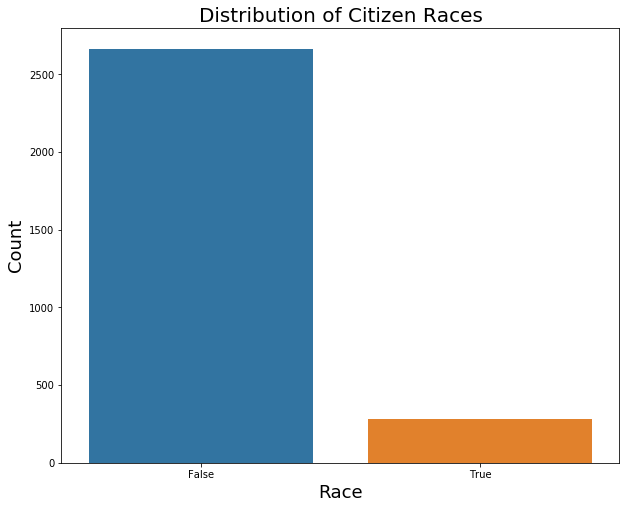

In [169]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = "off_injured", data = prr19)
ax.set_title('Distribution of Citizen Races', fontsize = 20)
ax.set_xlabel('Race', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18)
plt.show()

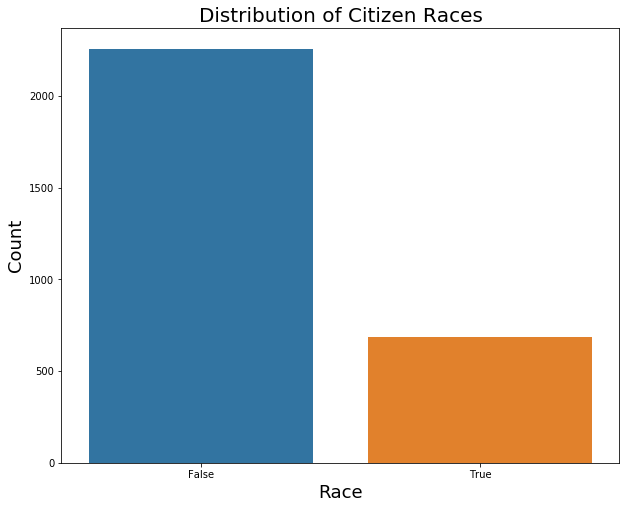

In [170]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = "cit_injured", data = prr19)
ax.set_title('Distribution of Citizen Races', fontsize = 20)
ax.set_xlabel('Race', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18)
plt.show()

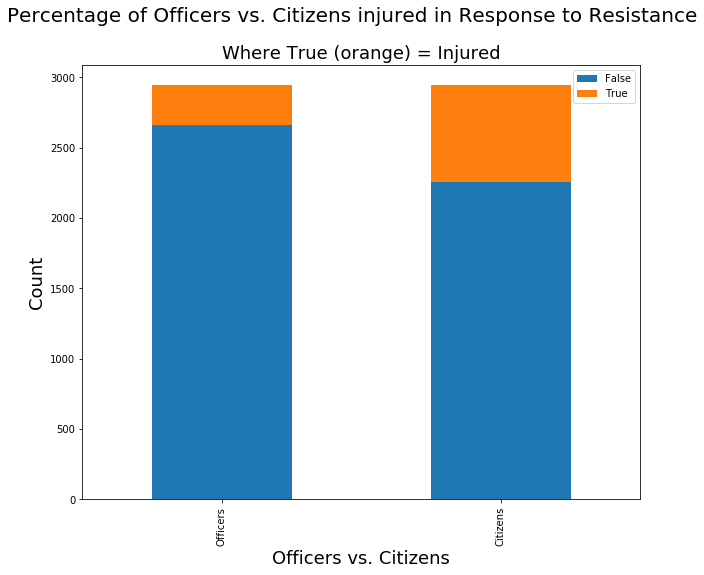

In [171]:
off_inj = prr19.off_injured.value_counts()
cit_inj = prr19.cit_injured.value_counts()
injured = pd.DataFrame([off_inj, cit_inj])
injured.index = ['Officers','Citizens']

fig, ax = plt.subplots(figsize = (10, 8))
injured.plot(kind='bar', stacked=True, ax = ax);
plt.suptitle('Percentage of Officers vs. Citizens injured in Response to Resistance', fontsize = 20)
plt.title('Where True (orange) = Injured', fontsize = 18)
ax.set_xlabel('Officers vs. Citizens', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18)
plt.show()

In [172]:
prr19.off_injured.value_counts(normalize = True)

False    0.905231
True     0.094769
Name: off_injured, dtype: float64

In [173]:
prr19.cit_injured.value_counts(normalize = True)

False    0.767323
True     0.232677
Name: cit_injured, dtype: float64

From the above, we can see that just under 10% of officers are injured in response to resistance and 23% of citizen's are injured in response to resistance.  

However, these numbers are misleading given how our data is formatted and what a row represents.  We have to remember than each row is the results of ONE police officer's use of force for the incident they were involved in.  So, if there were 5 officers on the scene and all 5 used force towards the citizen, then perhaps only 1 officer's use of force resulted in injury to the citizen, however, that individual will show 'not injured' for 4 of the other officer's user of force and 'injured' for the 5th, but the overall result is that that citizen was injured during a use of force incident.  So, we need to isolate the data down to incidents, and discover whether the citizen was injured.  Since a row represents 1 officer, the officer injured statistics above should be correct, but we will need to adjust things to account for the citizen being injured.  We could do this using a group by method  (grouping by the file number).  

In [174]:
prr19.groupby(['file_num']).count()

,objectid,zip,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
file_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
UF2018-1734,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
UF2019-0001,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
UF2019-0002,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
UF2019-0003,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
UF2019-0004,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UF2019-1803,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
UF2019-1804,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
UF2019-1805,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


So, the above dataframe essentially tells us how many cops were involved in a particular incident.  We should then create an aggregate column that lists whether the end result of an incident lead to the injury of the citizen.  

### Use of Force Types:

In [175]:
len(prr19.uof_type.unique())

915

So there are 915 different combinations of use of force.  I need to figure out how to seperate these types of force in a way that I can make conclusions about them.

-------
Testing stuff

In [176]:
ttest = 'hello, yes'
splitted = ttest.split(',')

In [177]:
splitted

['hello', ' yes']

In [178]:
test = ['hello', 'he, llo', 'what, do, you', 'think, hello', 'what, yes, he']

In [179]:
unique = []
for item in test:
    split = item.split(',')
    for thing in split:
        thing = thing.strip()
        if thing not in unique:
            unique.append(thing)
unique

['hello', 'he', 'llo', 'what', 'do', 'you', 'think', 'yes']

-------

In [180]:
prr19.uof_type.unique()

array(['BD - Tripped, BD - Grabbed', 'Held Suspect Down',
       'K-9 Deployment', 'Joint Locks', 'Joint Locks, BD - Grabbed',
       'Weapon display at Person', 'Handcuffing Take Down',
       'BD - Grabbed',
       'Verbal Command, Feet/Leg/Knee Strike, Held Suspect Down',
       'Take Down - Body', 'Take Down - Arm', 'BD - Tripped',
       'Foot Pursuit', 'Handcuffing Take Down, Take Down - Arm',
       'OC Spray', 'Take Down - Group', 'Foot Pursuit, Verbal Command',
       'BD - Grabbed, Held Suspect Down', 'Verbal Command, BD - Grabbed',
       'Hand Controlled Escort',
       'Verbal Command, Take Down - Group, Handcuffing Take Down',
       'Taser, Verbal Command, Foot Pursuit',
       'Verbal Command, Hand/Arm/Elbow Strike, Handcuffing Take Down',
       'Taser Display at Person',
       'BD - Pushed, Hand/Arm/Elbow Strike, Verbal Command',
       'BD - Pushed, Take Down - Arm, Joint Locks',
       'Verbal Command, Hand Controlled Escort, Held Suspect Down',
       'Taser Displ

In [181]:
unique_uof = []
for uof_combo in prr19.uof_type.unique():
    split = uof_combo.split(',')
    for uof in split:
        uof = uof.strip()
        if uof not in unique_uof:
            unique_uof.append(uof)
print(f'Number of unique uses of force: {len(unique_uof)}')
unique_uof

Number of unique uses of force: 32


['BD - Tripped',
 'BD - Grabbed',
 'Held Suspect Down',
 'K-9 Deployment',
 'Joint Locks',
 'Weapon display at Person',
 'Handcuffing Take Down',
 'Verbal Command',
 'Feet/Leg/Knee Strike',
 'Take Down - Body',
 'Take Down - Arm',
 'Foot Pursuit',
 'OC Spray',
 'Take Down - Group',
 'Hand Controlled Escort',
 'Taser',
 'Hand/Arm/Elbow Strike',
 'Taser Display at Person',
 'BD - Pushed',
 'Pressure Points',
 'Leg Restraint System',
 'Take Down - Head',
 'Pepperball Saturation',
 'Pepperball Impact',
 'Baton Display',
 'Combat Stance',
 'Head Butt',
 'LVNR',
 '40mm Less Lethal',
 'Other Impact Weapon',
 'Baton Strike/Open Mode',
 'Vehicle Pursuit']

So in summary, there are 915 combinations of these 32 uses of force. I'm not sure what "BD", "OC" or "LVNR" means...

Let's do the same for service_type:

In [182]:
prr19.service_type.unique()

array(['Service Call', 'Arrest', 'Call for Cover', nan,
       'Other ( In Narrative)', 'Crime in Progress',
       'Suspicious Activity', 'Traffic Stop', 'Warrant Execution',
       'Crowd Control', 'Off-Duty Employment', 'Pedestrian Stop',
       'Off-Duty Incident'], dtype=object)

In [183]:
len(prr19.service_type.unique())

13

In [184]:
prr19.service_type.isna().sum()

7

Will need to think about how I'm going to deal with this column for my model. 

For an FSM I think I might just do 2 things:  
1. Chuck everything and LOL and see what happens
2. Do a reduced version of this where I only put in a subset of the features including demographic information to predict injured/not injured.

## Up next:

Next, I'm going to put together an FSM taking into consideration the findings of this EDA.  Then I'll come back and think about how I'm going to be more thoughtful about how to deal with these features. 

I also need to think about which metric will be best to use as well as being clear on who my audience is here and who this model is for...

Let's see where my current data frame is and export it to a csv for use in my model later. 

In [185]:
prr19.head()

,objectid,zip,file_num,uof_num,date_occured,time_occured,current_ba,off_sex,off_race,hire_date,off_injured,off_cond_type,off_hospital,service_type,uof_type,uof_reason,cycles_num,uof_effective,street_n,street,street_g,street_t,address,cit_num,cit_race,cit_sex,cit_injured,cit_cond_type,cit_arrest,cit_influence,cit_charge_type,council_district,ra,beat,sector,division,x,y,geolocation,council_districts_test,dallas_city_limis_gis_layer
0,2817,75253.0,UF2019-1702,"62295, 63542",2019-12-01,2020-08-04 22:34:00,11285,Male,White,2017-03-08,False,No injuries noted or visible,False,Service Call,"BD - Tripped, BD - Grabbed",Detention/Frisk,NaN,"Yes, Yes",102,Beltline,S,Rd.,102 S Beltline Rd.,60833,White,Male,False,No injuries noted or visible,False,Agitated,No Arrest,D8,6062.0,357.0,350.0,SOUTHEAST,2557123.437,6944231.397,POINT (-96.586265 32.702825),8.0,3.0
1,2234,75208.0,UF2019-1344,61093,2019-10-06,2020-08-04 00:50:00,11208,Male,White,2016-08-24,True,No injuries noted or visible,False,Arrest,Held Suspect Down,Arrest,NaN,Yes,1500,Oak Cliff,S,Blvd.,1500 S Oak Cliff Blvd.,6020748798,Hispanic,Female,True,Injured prior to contact,True,Agitated,APOWW,D1,4160.0,444.0,440.0,SOUTHWEST,2474936.793,6952151.398,POINT (-96.853036 32.729136),1.0,3.0
2,2755,75231.0,UF2019-1665,62820,2019-12-31,2020-08-04 23:37:00,9415,Male,White,2008-04-02,False,No injuries noted or visible,False,Arrest,K-9 Deployment,Arrest,NaN,Yes,6904,Walling,NaN,Ln.,6904 Walling Ln.,61130,Black,Male,True,Bite,True,Poor hygiene,"Burglary/Habitation, Warrant/Hold",D9,6034.0,247.0,240.0,NORTHEAST,2508349.267,7001784.466,POINT (-96.741661 32.863941),13.0,3.0
3,2110,75228.0,UF2019-1314,60990,2019-09-30,2020-08-04 18:20:00,9884,Male,Hispanic,2009-06-10,False,No injuries noted or visible,False,Call for Cover,Joint Locks,Arrest,NaN,Yes,11760,Ferguson,NaN,Rd.,11760 Ferguson Rd.,26625,White,Female,False,No injuries noted or visible,True,Unknown Drugs,"Assault/FV, Resisting Arrest, Warrant/Hold",D9,1132.0,228.0,220.0,NORTHEAST,2536678.324,6999039.025,POINT (-96.649175 32.855492),13.0,3.0
4,1663,75051.0,UF2019-1030,"59592, 59600",2019-08-04,2020-08-04 00:10:00,10480,Male,Hispanic,2012-09-26,True,No injuries noted or visible,False,Arrest,"Joint Locks, BD - Grabbed",Arrest,NaN,"Yes, Yes",1350,Skyline,NaN,Rd.,1350 Skyline Rd.,59513,Black,Male,False,No injuries noted or visible,True,Agitated,Assault/Public Servant,NaN,NaN,NaN,NaN,NaN,2433285.622,6953645.720,POINT (-96.98722 32.734935),NaN,NaN


In [186]:
prr19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 41 columns):
objectid                       2944 non-null int64
zip                            2943 non-null float64
file_num                       2944 non-null object
uof_num                        2944 non-null object
date_occured                   2944 non-null datetime64[ns]
time_occured                   2931 non-null datetime64[ns]
current_ba                     2944 non-null int64
off_sex                        2944 non-null object
off_race                       2944 non-null object
hire_date                      2944 non-null datetime64[ns]
off_injured                    2944 non-null bool
off_cond_type                  2944 non-null object
off_hospital                   2944 non-null bool
service_type                   2937 non-null object
uof_type                       2944 non-null object
uof_reason                     2937 non-null object
cycles_num                     174 non-nul

Quickly check cit_influence:

In [187]:
prr19.cit_influence.unique()

array(['Agitated', 'Poor hygiene', 'Unknown Drugs', 'Alchohol', nan,
       'Mentally unstable', 'Unknown', 'Alchohol and unknown drugs',
       'None detected', 'Marijuana', 'Incoherent',
       'Talking to themselves'], dtype=object)

In [188]:
prr19.cit_influence.isna().sum()

79

-----

**don't run these cells**

Turn all the 'Unknown' categories into np.nans:

In [97]:
prr19.cit_influence.replace('Unknown', np.nan, inplace = True)

In [98]:
prr19.cit_influence.isna().sum()

420

On second thoughts that may not be an appropriate move since 'Unknown' probably means that they've identified that the citizen is under some kind of influence but it is unknown of what it is.  However, nan probably means it is not applicable because they were not under the influence... I'm going to rerun the above cells to undo what I just did...

-----

In [190]:
modified_prr19 = prr19.to_csv(parent_dir + 'data/modified_data/prr19_cleaned')